
## Step 1: Setup and Data Overview

In [1]:
# Standard libraries
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Dataset path
DATA_PATH = '../data/raw/Plant_leave_diseases_dataset_without_augmentation' 

# Getting all category folders (each representing a class)
categories = sorted([
    folder for folder in os.listdir(DATA_PATH)
    if os.path.isdir(os.path.join(DATA_PATH, folder))
])

# Class information
print(f"Total number of categories: {len(categories)}")
print("Class names:", categories)

Total number of categories: 39
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tar

## Step 2: Count Images per Class

In [2]:
# Counting how many images are present in each class
image_counts = {}

for category in categories:
    category_path = os.path.join(DATA_PATH, category)
    image_files = os.listdir(category_path)
    image_counts[category] = len(image_files)

# Sorting the dictionary to see which classes have the most or least images
sorted_counts = dict(sorted(image_counts.items(), key=lambda item: item[1], reverse=True))

# Just printing top 5 classes to verify the output
print("Sample image counts (top 5):")
for k, v in list(sorted_counts.items())[:5]:
    print(f"{k}: {v} images")

Sample image counts (top 5):
Orange___Haunglongbing_(Citrus_greening): 5507 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Soybean___healthy: 5090 images
Peach___Bacterial_spot: 2297 images
Tomato___Bacterial_spot: 2127 images


 ## Step 3: Plot the Distribution

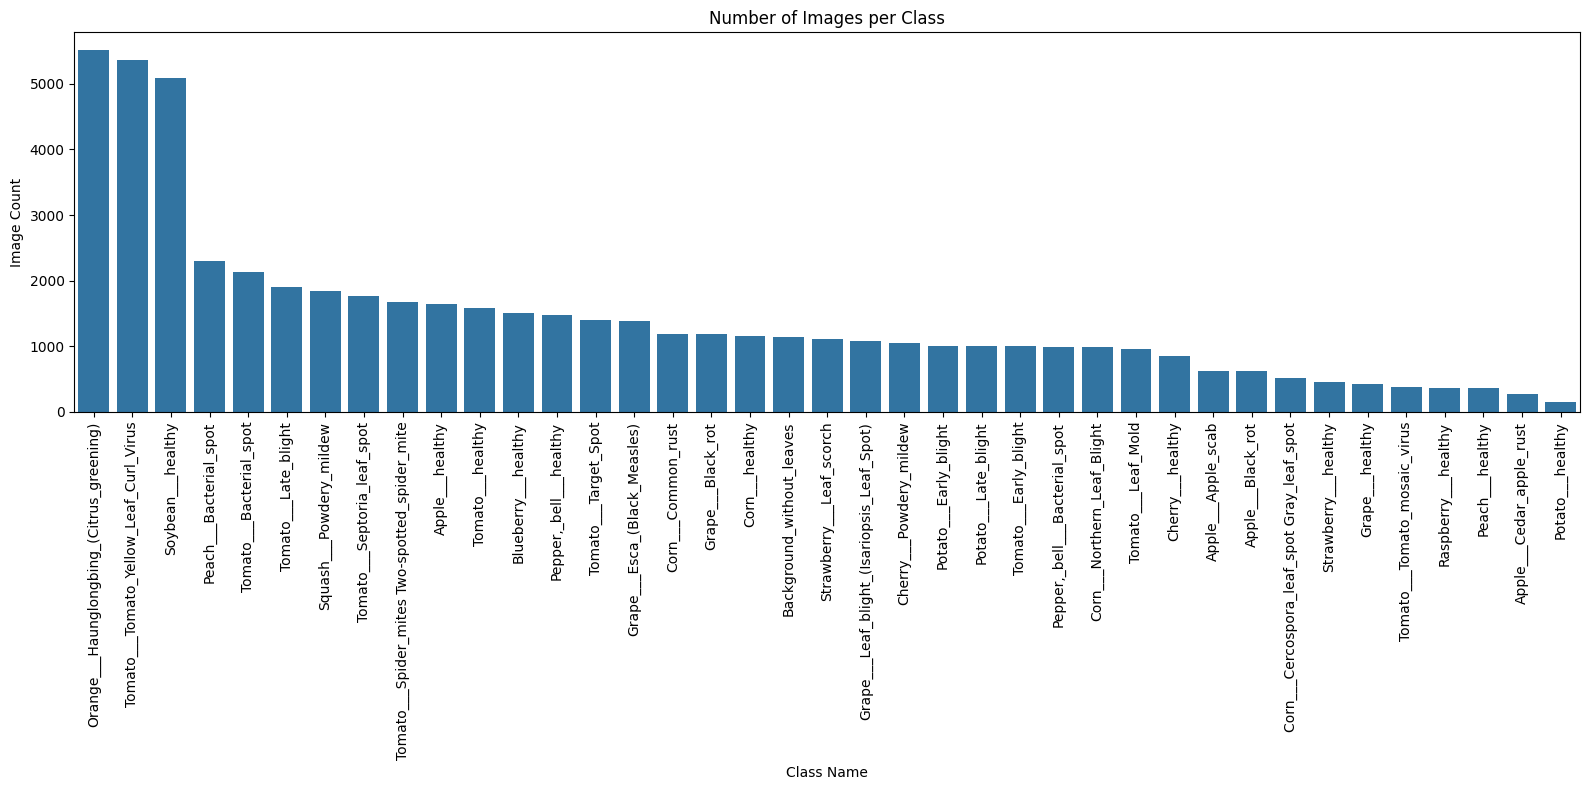

In [3]:
# Plotting the distribution of images per class to visualize imbalance
plt.figure(figsize=(16, 8))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()))
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

## Step 4: Checking Image Resolutions

In [5]:
# Now checking what resolutions these plant images have
from collections import Counter
from PIL import Image

shape_counter = Counter()

# Just looping through each category folder to get image shapes
for category in categories:
    category_path = os.path.join(DATA_PATH, category)
    for fname in os.listdir(category_path)[:5]:  # only first 5 images per category
        img_path = os.path.join(category_path, fname)
        try:
            img = Image.open(img_path)
            shape_counter[img.size] += 1
        except:
            pass #skip if any error comes

# Showing common image shapes
print("Image shapes found:")
for shape, count in shape_counter.most_common(5):
    print(f"{shape}: {count} images")

Image shapes found:
(256, 256): 190 images
(256, 192): 5 images
